In [1]:
# %pip install plotly_express

     |████████████████████████████████| 26.5 MB 32 kB/s 
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# %pip install folium

  Using cached folium-0.12.1.post1-py2.py3-none-any.whl (95 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# imports for basic mathematical operations
import numpy as np
import pandas as pd
# imports for plotting / data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly_express as px
# import for networks
import networkx as nx
# import for checking the path of files
import os

In [16]:
print(os.listdir("../data"))

['world_countries.json', 'Canada.xlsx', 'Canada.csv']


In [7]:
# df = pd.read_excel("../data/Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)

In [64]:
df = pd.read_csv("../data/Canada.csv")

In [65]:
df.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
5,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
6,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
7,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
8,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121
9,Immigrants,Foreigners,Austria,908,Europe,926,Western Europe,901,Developed regions,234,...,118,122,102,98,91,109,124,84,102,90


In [66]:
df.shape

(179, 43)

In [67]:
df.sample(15)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
95,Immigrants,Foreigners,Malaysia,935,Asia,920,South-Eastern Asia,902,Developing regions,786,...,401,593,580,600,658,640,802,409,358,204
158,Immigrants,Foreigners,Togo,903,Africa,914,Western Africa,902,Developing regions,5,...,163,157,149,235,351,400,354,261,299,316
132,Immigrants,Foreigners,Saint Vincent and the Grenadines,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,147,...,294,343,383,579,434,511,434,451,523,538
65,Immigrants,Foreigners,Guatemala,904,Latin America and the Caribbean,916,Central America,902,Developing regions,114,...,217,190,230,258,263,264,266,288,358,345
154,Immigrants,Foreigners,Syrian Arab Republic,935,Asia,922,Western Asia,902,Developing regions,315,...,1116,1458,1145,1056,919,917,1039,1005,650,1009
140,Immigrants,Foreigners,Sierra Leone,903,Africa,914,Western Africa,902,Developing regions,6,...,347,191,138,92,103,70,63,96,72,63
8,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121
34,Immigrants,Foreigners,"China, Hong Kong Special Administrative Region",935,Asia,906,Eastern Asia,902,Developing regions,0,...,536,729,712,674,897,657,623,591,728,774
19,Immigrants,Foreigners,Bolivia (Plurinational State of),904,Latin America and the Caribbean,931,South America,902,Developing regions,44,...,85,134,139,107,143,214,180,86,83,107
71,Immigrants,Foreigners,Iceland,908,Europe,924,Northern Europe,901,Developed regions,17,...,23,10,2,15,13,15,30,38,42,72


In [68]:
df.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [69]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')

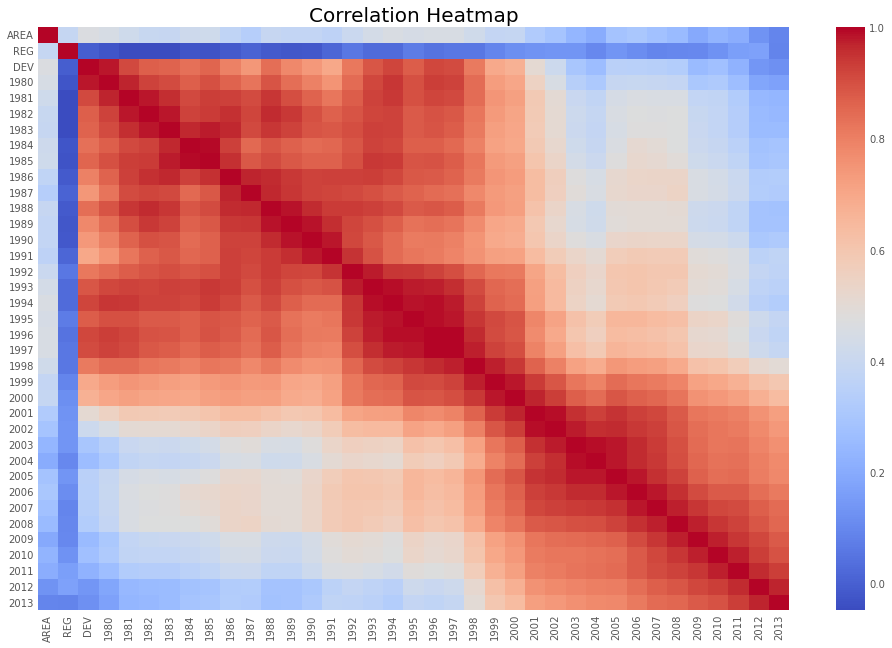

In [70]:
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

In [71]:
fig = px.bar_polar(df, r = "REG", theta = "AreaName", color = "RegName", template = "plotly_dark", color_discrete_sequence = px.colors.sequential.Plasma[-2::-1])
fig.show()

In [72]:
df.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [73]:
import plotly.io as pio

pio.templates.default = 'ggplot2'
d = df[["Coverage", "AreaName", "DevName", "1980"]]
fig = px.parallel_categories(d, color="1980", color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

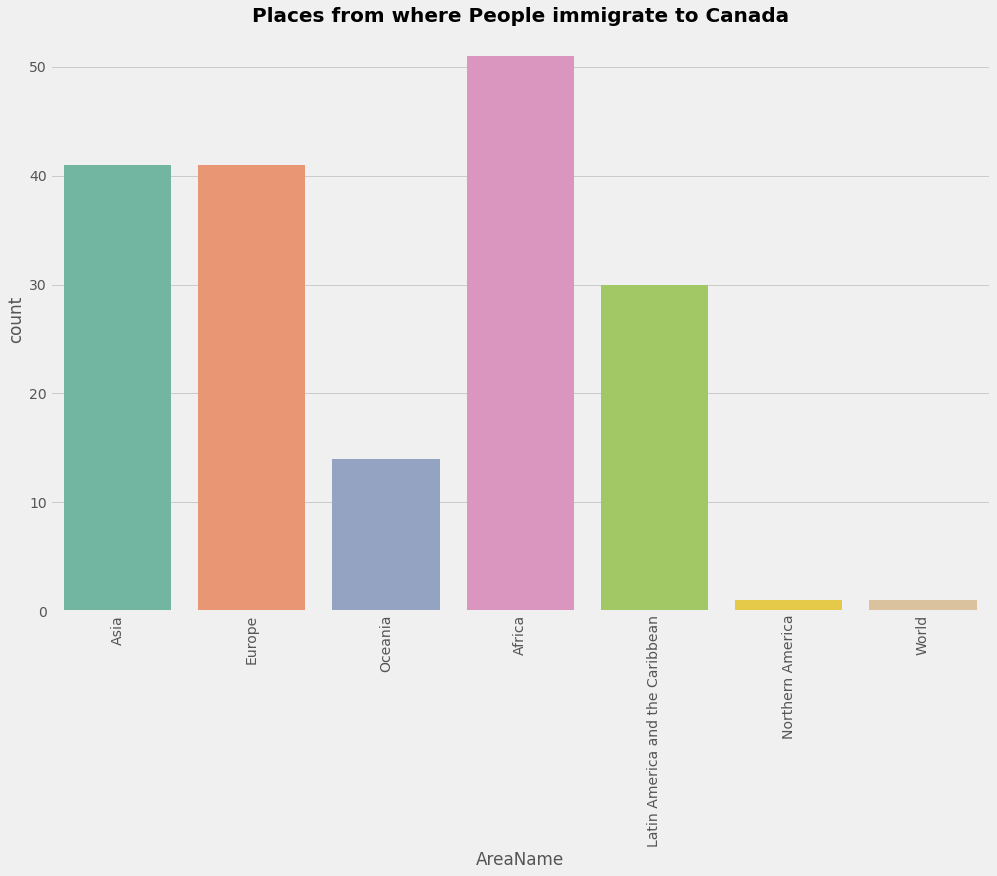

In [74]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use('fivethirtyeight')

sns.countplot(x = df.AreaName, palette="Set2")
plt.title("Places from where People immigrate to Canada", fontsize=20, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [75]:
# %pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


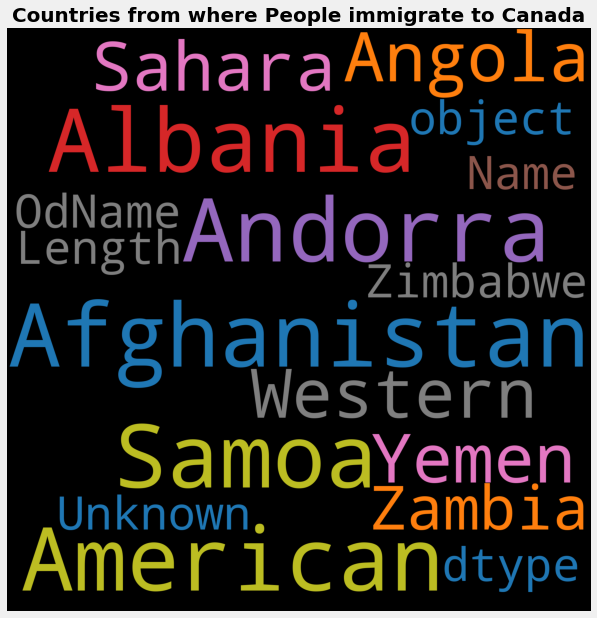

In [76]:
from wordcloud import WordCloud

wc = WordCloud(background_color = "black",
               width = 2000,
               height = 2000,
               colormap = "tab10",
               max_words = 50
               ).generate(str(df.OdName))

plt.rcParams["figure.figsize"] = (15, 10)
plt.title("Countries from where People immigrate to Canada", fontsize=20, fontweight="bold")
plt.imshow(wc)
plt.axis("off")
plt.show()


In [77]:
import plotly.express as px

gapminder = px.data.gapminder()
fig = px.scatter_geo(gapminder, locations="iso_alpha", color="continent", hover_name="country", size="pop", animation_frame="year", projection="natural earth")
fig.show()

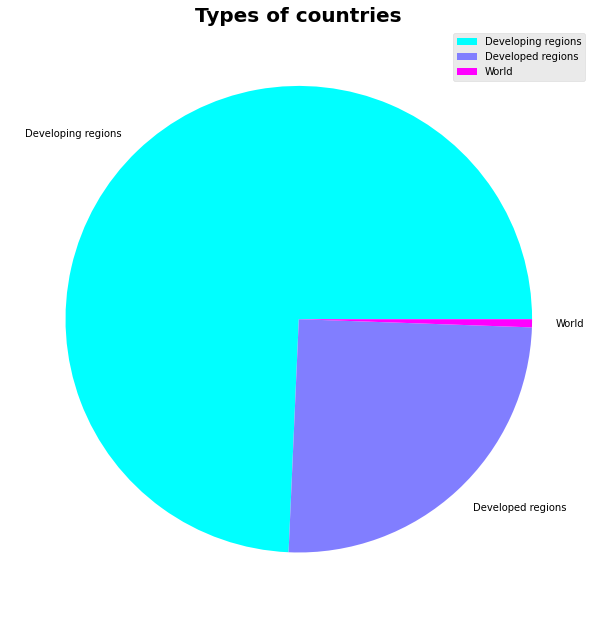

In [78]:
plt.style.use('ggplot')
colors = plt.cm.cool(np.linspace(0, 50, 100))
df.DevName.value_counts().plot.pie(colors=colors, figsize=(15, 10))
plt.title("Types of countries", fontsize=20, fontweight="bold")
plt.axis("off")
plt.legend()
plt.show()

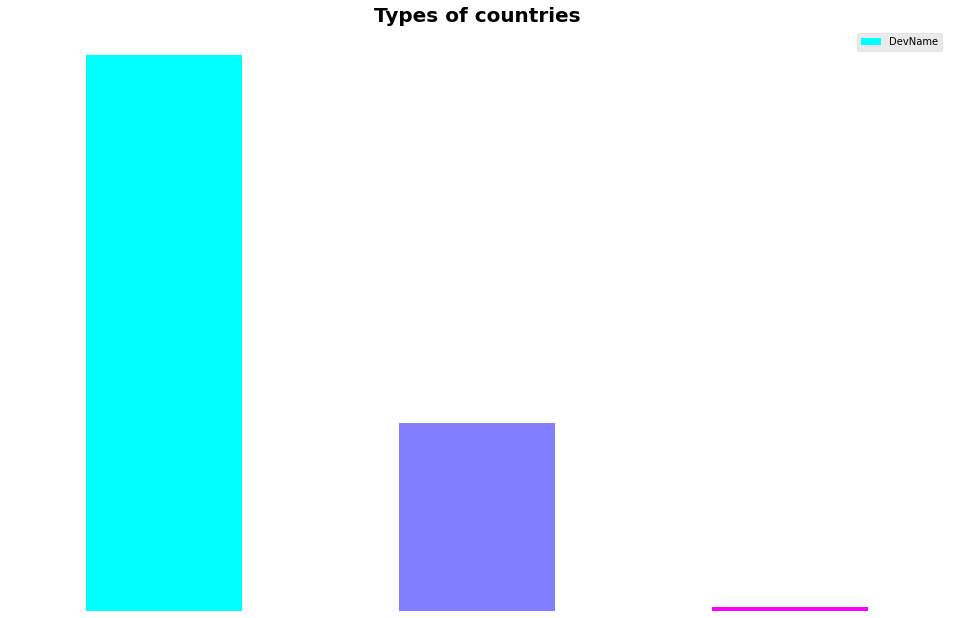

In [79]:
plt.style.use('ggplot')
colors = plt.cm.cool(np.linspace(0, 50, 100))
df.DevName.value_counts().plot(kind="bar",color=colors, figsize=(15, 10))
plt.title("Types of countries", fontsize=20, fontweight="bold")
plt.axis("off")
plt.legend()
plt.show()

NOW, LET'S SEE HOW MUH IMIGRATION PATTERNS HAVE CHANGED FROM 1980 TO 2013

In [80]:
pio.templates.default = "seaborn"
fig = px.scatter(df, x="1980", y="2013", facet_col="DevName", width=800, height=700)
fig.update_layout(margin=dict(l=100, r=100, t=100, b=100), paper_bgcolor="LightBlue",)
fig.update_traces(marker=dict(size=10, line=dict(width=2, color="DarkSlateGrey")), selector=dict(mode="markers"))
fig.show()

In [81]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45


In [82]:
df = df.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis=1)
df['Total'] = df.sum(axis=1)
df.head()

/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T/ipykernel_18096/778593244.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
3,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
4,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113


In [83]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,465.424581,341.508380,348.513966,271.547486,293.139665,290.547486,337.513966,498.759777,501.379888,646.134078,...,522.608939,513.441341,512.256983,507.558659,516.776536,541.776536,461.899441,457.536313,451.134078,17129.899441
std,3317.927285,1448.866509,1418.524718,1158.623530,1309.420597,1231.027534,1215.283078,1686.656180,1944.815124,2533.457695,...,905.740322,876.579826,833.984056,835.506582,850.639796,883.908319,710.216371,668.126714,648.525201,45061.718205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,...,23.500000,18.000000,22.500000,25.500000,23.500000,29.000000,23.500000,34.000000,39.000000,773.500000
50%,7.000000,6.000000,8.000000,6.000000,8.000000,9.000000,11.000000,19.000000,19.000000,25.000000,...,185.000000,149.000000,147.000000,160.000000,167.000000,180.000000,148.000000,173.000000,174.000000,4192.000000
75%,185.500000,200.500000,188.000000,123.000000,128.000000,161.000000,201.000000,276.000000,267.500000,291.000000,...,587.000000,534.500000,614.500000,616.500000,594.500000,626.000000,538.500000,561.000000,514.500000,16421.500000
max,44000.000000,18078.000000,16904.000000,13635.000000,14855.000000,14368.000000,13303.000000,17304.000000,22279.000000,27118.000000,...,5048.000000,4714.000000,4348.000000,4756.000000,5532.000000,6242.000000,4399.000000,3878.000000,3261.000000,515059.000000


In [84]:
df.columns

Index(['OdName', 'AreaName', 'RegName', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [85]:
df.isna().sum()

OdName      0
AreaName    0
RegName     0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
Total       0
dtype: int64

In [86]:
df.sum(axis=0)

OdName      AfghanistanAlbaniaAmerican SamoaAndorraAngolaA...
AreaName    AsiaEuropeOceaniaEuropeAfricaLatin America and...
RegName     Southern AsiaSouthern EuropePolynesiaSouthern ...
DevName     Developing regionsDeveloped regionsDeveloping ...
1980                                                    83311
1981                                                    61130
1982                                                    62384
1983                                                    48607
1984                                                    52472
1985                                                    52008
1986                                                    60415
1987                                                    89278
1988                                                    89747
1989                                                   115658
1990                                                   127485
1991                                                   138067
1992    

In [87]:
world_geo = r'world_countries.json'

In [88]:
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles="CartoDB dark_matter")

In [90]:
print(world_geo)
print(world_map)

world_countries.json
